# MNIST 入门

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [14]:
input_size = 1
output_size = 1
num_epochs = 600
learning_rate = 0.001

In [15]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [16]:
class LinearRegression(torch.nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.linear = torch.nn.Linear(input_size,output_size)
    def forward(self,x):
        out = self.linear(x)
        return out

In [17]:
model = LinearRegression(input_size,output_size)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [18]:
inputs = Variable(torch.from_numpy(x_train))
y = Variable(torch.from_numpy(y_train))
for t in range(num_epochs):
    y_pred = model(inputs)
    
    loss = loss_fn(y_pred,y)
    
    print(t,loss.data[0])
    
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()

0 84.99498748779297
1 71.01387023925781
2 59.34420394897461
3 49.60383987426758
4 41.47380828857422
5 34.68788146972656
6 29.023828506469727
7 24.296186447143555
8 20.350126266479492
9 17.056438446044922
10 14.307267189025879
11 12.012588500976562
12 10.09726333618164
13 8.498573303222656
14 7.1641693115234375
15 6.050356864929199
16 5.120666980743408
17 4.344658851623535
18 3.6969244480133057
19 3.1562564373016357
20 2.704953908920288
21 2.3282430171966553
22 2.0137908458709717
23 1.751304268836975
24 1.5321927070617676
25 1.349284291267395
26 1.1965937614440918
27 1.0691254138946533
28 0.9627094864845276
29 0.8738653659820557
30 0.7996877431869507
31 0.7377520203590393
32 0.6860342621803284
33 0.642845094203949
34 0.6067745685577393
35 0.5766457915306091
36 0.5514765381813049
37 0.5304467082023621
38 0.5128719806671143
39 0.4981813430786133
40 0.48589766025543213
41 0.4756231904029846
42 0.4670258164405823
43 0.45982804894447327
44 0.453798770904541
45 0.44874462485313416
46 0.444504

362 0.3855731785297394
363 0.38546180725097656
364 0.3853505849838257
365 0.3852393925189972
366 0.385128378868103
367 0.3850172758102417
368 0.3849063217639923
369 0.3847953975200653
370 0.3846845030784607
371 0.384573757648468
372 0.3844629228115082
373 0.38435229659080505
374 0.38424164056777954
375 0.3841310739517212
376 0.38402053713798523
377 0.38391005992889404
378 0.38379961252212524
379 0.3836892545223236
380 0.38357892632484436
381 0.3834686875343323
382 0.3833584785461426
383 0.38324838876724243
384 0.3831382989883423
385 0.3830283284187317
386 0.3829183280467987
387 0.38280847668647766
388 0.38269859552383423
389 0.38258880376815796
390 0.3824790418148041
391 0.3823693096637726
392 0.38225969672203064
393 0.38215017318725586
394 0.3820406198501587
395 0.38193121552467346
396 0.3818218410015106
397 0.38171249628067017
398 0.3816031217575073
399 0.3814939856529236
400 0.3813847601413727
401 0.3812757134437561
402 0.38116657733917236
403 0.38105759024620056
404 0.3809486329555

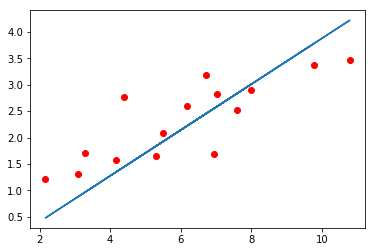

In [19]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
plt.plot(x_train,y_train,'ro',label='Origin data')
plt.plot(x_train,predicted,label='Fitted line')
plt.show()

In [20]:
torch.save(model,'model.pkl')

/Users/haxu/anaconda3/envs/deep-learning/lib/python3.6/site-packages/torch/serialization.py:147: UserWarning: Couldn't retrieve source code for container of type LinearRegression. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [21]:
del model

In [22]:
model = torch.load('model.pkl')

In [23]:
model

LinearRegression (
  (linear): Linear (1 -> 1)
)

In [24]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

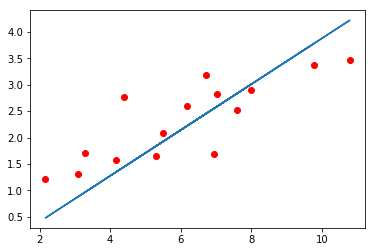

In [25]:
plt.plot(x_train,y_train,'ro',label='Origin data')
plt.plot(x_train,predicted,label='Fitted line')
plt.show()